# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        city_weather

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai


Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | remire-montjoly
Processing Record 4 of Set 1 | nacozari de garcia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | makaha
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | mankera
Processing Record 13 of Set 1 | zemetchino
Processing Record 14 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | bintulu
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | haiku-pauwela
Processing Record 19 of Set 1 | tucuma
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | edinburgh of the 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,5.33,85,95,4.93,NZ,1690985240
1,tazovsky,67.4667,78.7000,19.38,56,1,7.69,RU,1690985241
2,remire-montjoly,4.9167,-52.2667,31.02,66,75,3.09,GF,1690985242
3,nacozari de garcia,30.3742,-109.6908,25.49,47,0,0.92,MX,1690985242
4,port-aux-francais,-49.3500,70.2167,1.95,72,14,17.85,TF,1690985243


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,5.33,85,95,4.93,NZ,1690985240
1,tazovsky,67.4667,78.7000,19.38,56,1,7.69,RU,1690985241
2,remire-montjoly,4.9167,-52.2667,31.02,66,75,3.09,GF,1690985242
3,nacozari de garcia,30.3742,-109.6908,25.49,47,0,0.92,MX,1690985242
4,port-aux-francais,-49.3500,70.2167,1.95,72,14,17.85,TF,1690985243


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

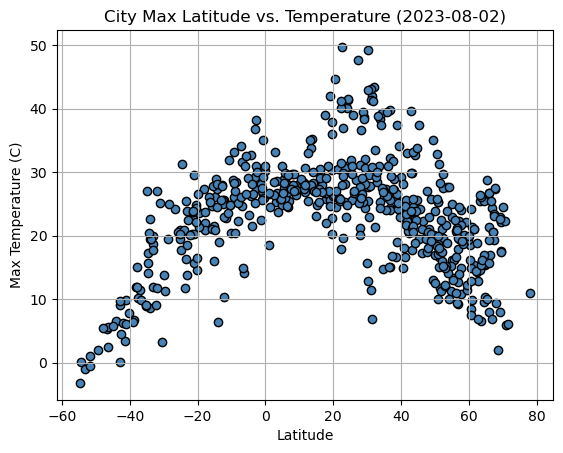

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolors="black")

# Set current date 
current_date = time.strftime("%Y-%m-%d")

# Plot title
plt.title(f"City Max Latitude vs. Temperature ({current_date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The scatter plot above displays the relationship between Latitude on the x axis and Max Temperature (C) on the y axis. The temperature increases the closer the cities are to the equator. The further away to the North and to the South the cities are from the equator shows the temperatures decreasing.

#### Latitude Vs. Humidity

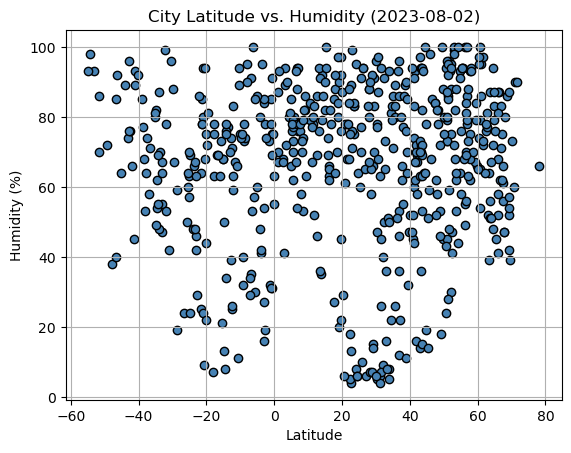

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolors="black")

# Set current date 
current_date = time.strftime("%Y-%m-%d")

# Plot title
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


The scatter plot above displays the relationship between Latitude and Humidity (%). Humidity seems to be fairly evenly distributed across the latitudes. From this we can infer that high humidity occurs for cities found closer to and also further away from the equator.

#### Latitude Vs. Cloudiness

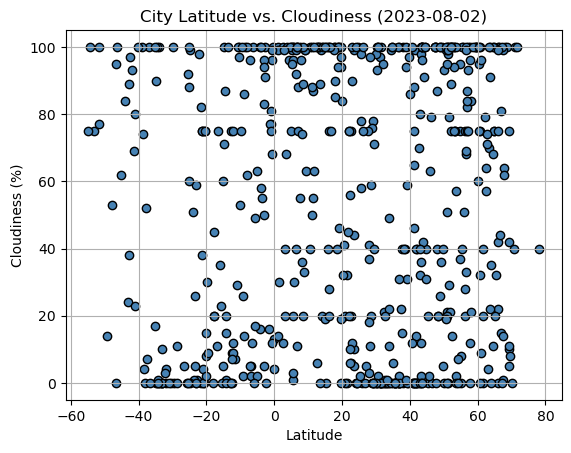

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolors="black")

# Set current date 
current_date = time.strftime("%Y-%m-%d")

# Plot title
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


The scatter plot above displays the relationship between Latitude and Cloudiness (%). The data is quite evenly distributed and from this we can infer that there is ittle or no difference in cloudiness for cities closer or further away from the equator.

#### Latitude vs. Wind Speed Plot

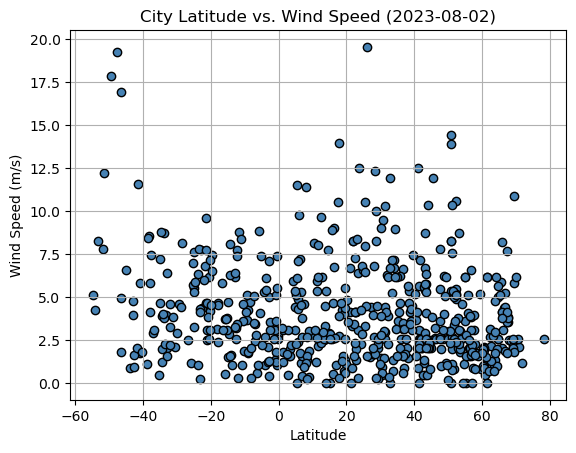

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolors="black")

# Set current date 
current_date = time.strftime("%Y-%m-%d")

# Plot title
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


The scatter plot above displays the relationship between Latitude and Wind Speed (m/s). The data is fairly evenly distributed except for a few outliers in the far Southern Hemisphere. We can infer that wind speed does not seem to be affected by the distance to the equator.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tazovsky,67.4667,78.7000,19.38,56,1,7.69,RU,1690985241
2,remire-montjoly,4.9167,-52.2667,31.02,66,75,3.09,GF,1690985242
3,nacozari de garcia,30.3742,-109.6908,25.49,47,0,0.92,MX,1690985242
5,makaha,21.4694,-158.2175,25.95,78,0,0.00,US,1690985244
6,st. john's,47.5649,-52.7093,19.88,84,100,3.60,CA,1690985123


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,5.33,85,95,4.93,NZ,1690985240
4,port-aux-francais,-49.3500,70.2167,1.95,72,14,17.85,TF,1690985243
8,grytviken,-54.2811,-36.5092,0.05,98,100,4.22,GS,1690985246
9,carnarvon,-24.8667,113.6333,17.74,69,99,5.53,AU,1690985246
10,punta arenas,-53.1500,-70.9167,-1.05,93,75,8.23,CL,1690984897


###  Temperature vs. Latitude Linear Regression Plot

##### Northern Hemisphere

The r-value is: -0.5472685468219944


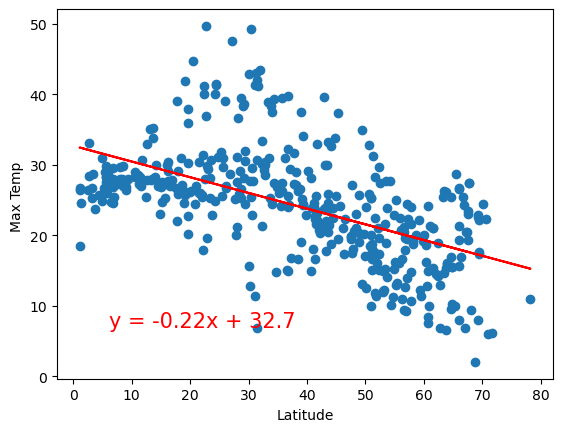

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Max Temp ")
plt.show()



##### Southern Hemisphere

The r-value is: 0.8292986415636996


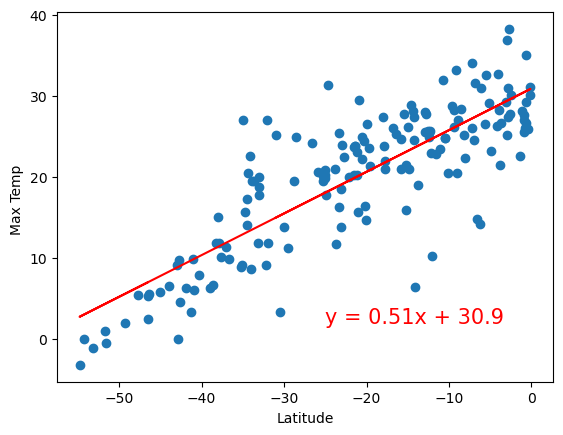

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (-25, 2), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Max Temp ")
plt.show()



**Discussion about the linear relationship:**  

The r-value of -0.5473 for the Northern Hemisphere scatter plot indicates a moderate negative correlation between Latitude and Maximum Temperature. The negative sign means that as the latitude increases (moving away from the equator), the maximum temperature tends to decrease. 

The r-value of 0.829 for the Southern Hemisphere scatter plot indicates a strong positive correlation between latitude and maximum temperature. This means that as we move towards the equator (higher latitudes), the maximum temperature tends to increase. The regression line, or the line of best fit, is used to approximate the relationship between latitude and maximum temperature. The data points in the scatter plot closely follow the regression line and this allows us to make predictions about the maximum temperature at different latitudes based on the data points.

### Humidity vs. Latitude Linear Regression Plot

##### Northern Hemisphere

The r-value is: 0.010167605381200661


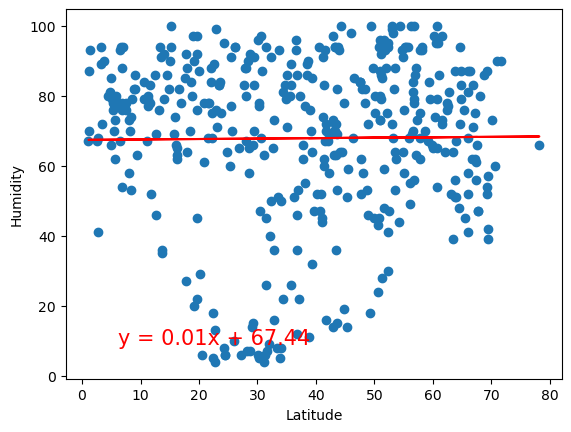

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


##### Southern Hemisphere

The r-value is: -0.19991057543439805


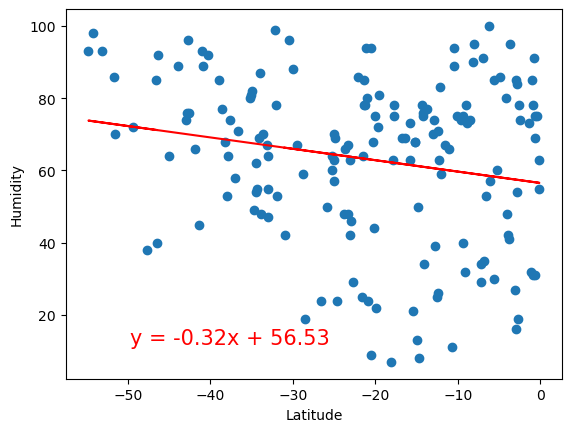

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

An r-value of 0.010168 for the Northern Hemisphere scatter plot indicates a very weak positive correlation between Latitude and Humidity. A positive sign of the correlation coefficient (r-value) suggests that there is a slight tendency for humidity to increase as latitude increases, but the correlation is so weak that it is almost negligible. When the correlation coefficient is close to zero, it suggests that changes in Latitude have little to no influence on the Humidity levels observed in the dataset.

An r-value of -0.199911 for the Southern Hemisphere scatter plot indicates a weak negative linear relationship between Latitude and Humidity suggesting that as Latitude increases, there might be a slight tendency for Humidity to decrease. There is a significant amount of variability in the data and other factors might be influencing the relationship between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

##### Northern Hemisphere

The r-value is: -0.05235604060575005


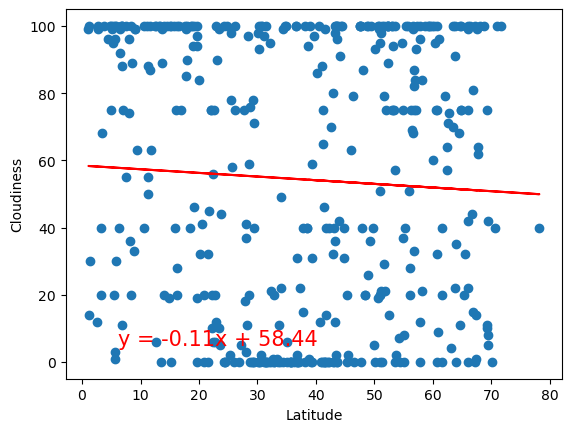

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

##### Southern Hemisphere

The r-value is: -0.19991057543439805


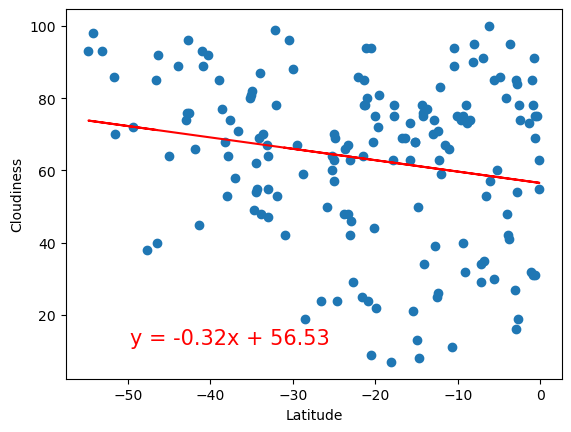

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

An r-value of -0.052356 for the Northern Hemisphere indicates a very weak negative linear relationship between Latitude and Cloudiness. There is a slight decrease in cloudiness as you move away from the equator. 

An r-value of -0.199911 for the Southern Hemisphere indicates a weak negative linear relationship suggesting that as Latitude increases, there might be a slight tendency for Cloudiness to decrease. There is a considerable amount of variability in the data. Other potential factors may be influencing the relationship between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

##### Northern Hemisphere

The r-value is: -0.08196642874948037


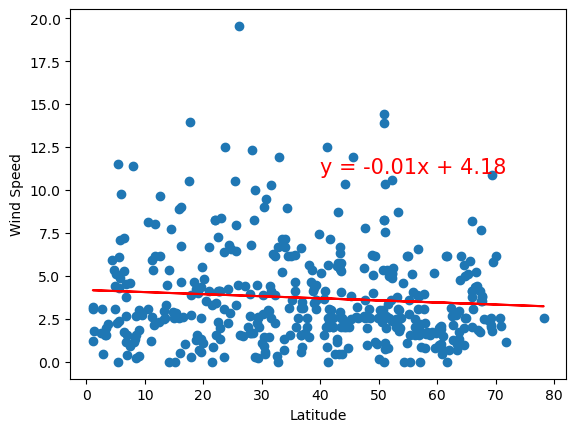

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (40,11), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

##### Southern Hemisphere

The r-value is: -0.3098543361322876


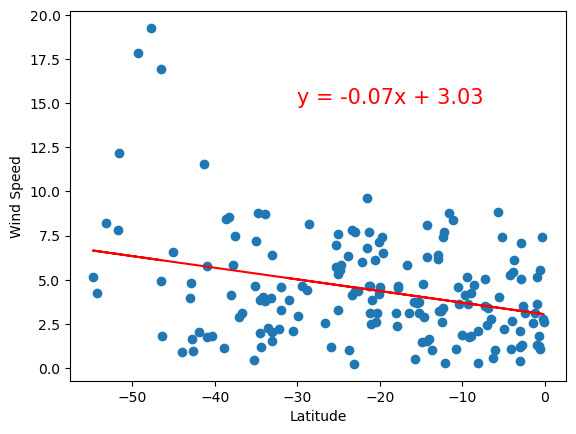

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Including the equation and r-value in the plot
plt.annotate(line_eq, (-30,15), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")
      
# Plotting the data points and regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

An r-value of -0.081966 for the Northern Hemisphere indicates a very weak negative linear relationship between Latitude and Wind Speed. The data points seem to be scattered randomly and so the regression line would not be a good predictor of Wind Speed based on Latitude.

An r-value of -0.309854 for the Southern Hemisphere indicates a weak negative linear relationship between Latitude and Wind Speed. The negative sign implies that there is a tendency for Wind Speed to decrease as you approach the Equator. The data points in the scatter plot are spread out from the line of regression indicating that other factors may be influencing Wind Speed and further analysis or a different model might be needed to better understand the relationship.